In [1]:
import os
import re

import pandas as pd

import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion


from sklearn.ensemble import ExtraTreesClassifier

import seaborn as sns

from matplotlib import pyplot as plt

from utils import CreateFeatures, Selector

# Exploratory Data Analysis and Feature Engineering

In [2]:
df_train = pd.read_csv('df_train.csv', index_col=0)

In [3]:
df_train

,form,id,text,box_0,box_1,box_2,box_3,label
0,..\data science part dataset\dataset\training_...,0,R&D,292,91,376,175,other
1,..\data science part dataset\dataset\training_...,1,:,219,316,225,327,question
2,..\data science part dataset\dataset\training_...,2,Suggestion:,95,355,169,370,question
3,..\data science part dataset\dataset\training_...,3,Date:,482,268,518,282,question
4,..\data science part dataset\dataset\training_...,4,Licensee,511,309,570,323,answer
...,...,...,...,...,...,...,...,...
7406,..\data science part dataset\dataset\training_...,32,Mr. L. Gordon,102,805,201,823,answer
7407,..\data science part dataset\dataset\training_...,33,Mr. J. P. Mastandrea,103,793,253,808,answer
7408,..\data science part dataset\dataset\training_...,34,Ms. S. Ridgway,102,778,208,792,answer
7409,..\data science part dataset\dataset\training_...,35,Mr. M. A. Peterson Mr. T. H. Mau,100,750,237,779,answer


[chaining estimators](https://scikit-learn.org/0.17/modules/pipeline.html#notes)

Calling fit on the pipeline is the same as calling fit on each estimator in turn, transform the input and pass it on to the next step. The pipeline has all the methods that the last estimator in the pipeline has, i.e. if the last estimator is a classifier, the Pipeline can be used as a classifier. If the last estimator is a transformer, again, so is the pipeline.

Units list from [International Society of Automation](https://www.isa.org/getmedia/192f7bda-c77c-480a-8925-1a39787ed098/CCST-Conversions-document.pdf)

In [4]:
pipe_preprocessing = Pipeline([('create_feats', CreateFeatures(text_col='text'))])

In [5]:
# pipe_selector = Pipeline([('select_feats', Selector(text_col='text'))])

In [6]:
# pipe_clf = Pipeline([('clf', ExtraTreesClassifier(n_estimators=25, random_state=0))])

In [7]:
# pipe = Pipeline([('create_feats', pipe_preprocessing),
#                  ('select_feats', pipe_selector),
#                  ('clf', pipe_clf)])

In [8]:
# Initialize X
X_train = df_train[['text', 'box_0', 'box_1']]
y_train = df_train[['label']]

# preprocess
X_train = pipe_preprocessing.fit_transform(X_train)

In [9]:
X_train

,text,box_0,box_1,text_len,is_number,final_colon,has_unit,is_date,digit_ratio
0,R&D,292,91,3.0,0,0,0,0,0.0
1,:,219,316,1.0,0,1,0,0,0.0
2,Suggestion:,95,355,11.0,0,1,0,0,0.0
3,Date:,482,268,5.0,0,1,0,0,0.0
4,Licensee,511,309,8.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
7406,Mr. L. Gordon,102,805,13.0,0,0,0,0,0.0
7407,Mr. J. P. Mastandrea,103,793,20.0,0,0,0,0,0.0
7408,Ms. S. Ridgway,102,778,14.0,0,0,0,0,0.0
7409,Mr. M. A. Peterson Mr. T. H. Mau,100,750,32.0,0,0,0,0,0.0


In [10]:
def _is_date_1(self, X, y = None):

    X_text_original = X[self.text_col].copy()


def _is_date_2(self, X, y = None):

    X_text_original = X[self.text_col].copy()

In [11]:
X_train_copy = X_train.copy()
X_train_copy.text.str.rstrip().str[-1:].eq(':')

0       False
1        True
2        True
3        True
4       False
        ...  
7406    False
7407    False
7408    False
7409    False
7410    False
Name: text, Length: 7411, dtype: bool

In [12]:
X_train_copy

,text,box_0,box_1,text_len,is_number,final_colon,has_unit,is_date,digit_ratio
0,R&D,292,91,3.0,0,0,0,0,0.0
1,:,219,316,1.0,0,1,0,0,0.0
2,Suggestion:,95,355,11.0,0,1,0,0,0.0
3,Date:,482,268,5.0,0,1,0,0,0.0
4,Licensee,511,309,8.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
7406,Mr. L. Gordon,102,805,13.0,0,0,0,0,0.0
7407,Mr. J. P. Mastandrea,103,793,20.0,0,0,0,0,0.0
7408,Ms. S. Ridgway,102,778,14.0,0,0,0,0,0.0
7409,Mr. M. A. Peterson Mr. T. H. Mau,100,750,32.0,0,0,0,0,0.0


In [13]:
X_train_copy['is_date_1'] = pd.to_datetime(X_train_copy['text'], errors='coerce').notna()

C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [14]:
X_train_copy.loc[:5,'text']

0            R&D
1              :
2    Suggestion:
3          Date:
4       Licensee
5            NaN
Name: text, dtype: object

In [15]:
from dateutil.parser import parse

def _is_date(text_input):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try:
        str_input = str(text_input)
        parse(str_input, fuzzy=True)
        return True

    except ValueError:        
        return False
    
    except OverflowError:
        return False

In [16]:
X_train_copy.loc[:,'text'].apply(_is_date)

C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname BY identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("

0       False
1       False
2       False
3       False
4       False
        ...  
7406    False
7407    False
7408    False
7409    False
7410    False
Name: text, Length: 7411, dtype: bool

In [17]:
X_train_copy['is_date_2'] = X_train_copy['text'].apply(_is_date)

C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\jpicao\anaconda3\envs\ml\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname BY identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("

In [18]:
X_train_copy.to_excel('test_feat.xlsx')

In [19]:
s_aux = pd.Series(['5', 'sfv 6.7.', '8979', 'sdvkj:sfv', ''])

In [20]:
s_aux.str.count('\d').div(s_aux.str.len())

0    1.00
1    0.25
2    1.00
3    0.00
4     NaN
dtype: float64

In [21]:
s_aux.str.count('\d').div(s_aux.str.len()).fillna(0)

0    1.00
1    0.25
2    1.00
3    0.00
4    0.00
dtype: float64

In [22]:
regex_pat_str = r'\b\d+\b'
re.findall(regex_pat_str, "pH- The pH of a 50% concentration of A32 in a 52.6% dioxane/water solution was calculated to be 2.92 at 22°C according to the extra- polation procedures by Dr. P. D. Schickedantz, Lorillard Research Center Accession No. 1662, Reference OR 83- 125.")

['50', '52', '6', '2', '92', '22', '1662', '83', '125']

In [23]:
pd.Series(['asd', 'adf.', 'adfaf:', 'sdvkj:sfv']).str.find(':').ge(0).astype('int8')

0    0
1    0
2    1
3    1
dtype: int8

In [24]:
pd.to_numeric(pd.Series(['4.35**', '3.61*', '3.63***', '3.45***', '3.17***']).str.replace("*", "", regex=False) , errors='coerce')


0    4.35
1    3.61
2    3.63
3    3.45
4    3.17
dtype: float64

In [25]:
pd.Series(['0', '3', '4.2', 'b']).astype('float64', errors='ignore')

0      0
1      3
2    4.2
3      b
dtype: object

## EDA

In [26]:
label_order=['question', 'answer', 'header', 'other']

### box coordinates

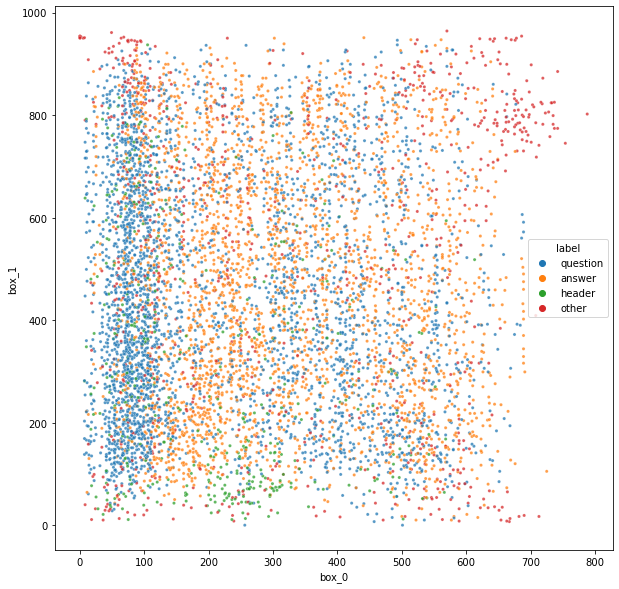

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=X_train.join(y_train), x='box_0', y='box_1', hue='label',
                s=10, alpha=0.75, hue_order=label_order)
plt.show()

### `text_len`

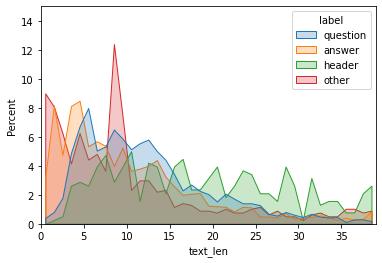

In [28]:
bin_interval = 1
bins_limits = np.arange(0, 40, bin_interval)

sns.histplot(data=X_train.join(y_train), x='text_len', hue='label', stat='percent',
             bins=bins_limits, element='poly', common_norm=False, hue_order=label_order)

plt.xlim(bins_limits.min(), bins_limits.max())
plt.ylim(0, 15)
plt.show()

### `is_number` 

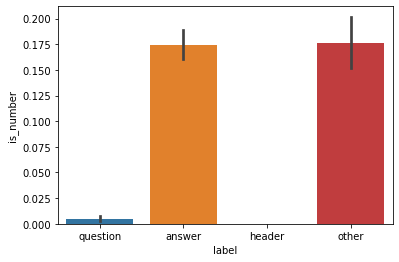

In [29]:
sns.barplot(data=X_train.join(y_train), y='is_number', estimator=np.mean, x='label', order=label_order)
plt.show()

### `final_colon` 

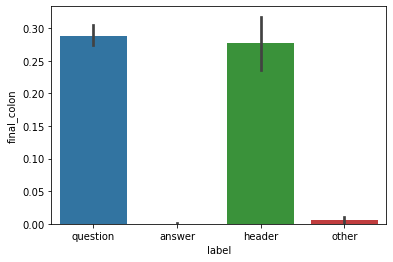

In [30]:
sns.barplot(data=X_train.join(y_train), y='final_colon', estimator=np.mean, x='label', order=label_order)
plt.show()

### `has_unit`  

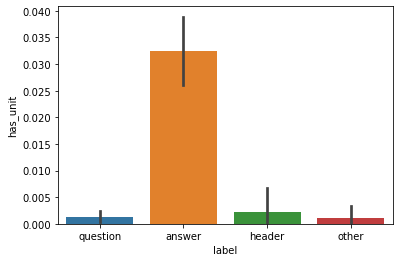

In [31]:
sns.barplot(data=X_train.join(y_train), y='has_unit', estimator=np.mean, x='label', order=label_order)
plt.show()

### `is_date`  

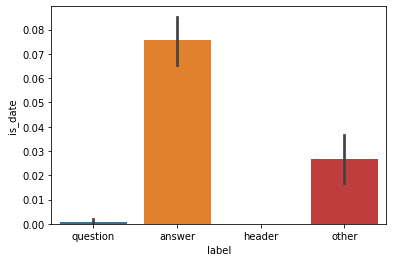

In [32]:
sns.barplot(data=X_train.join(y_train), y='is_date', estimator=np.mean, x='label', order=label_order)
plt.show()

### `digit_ratio`  

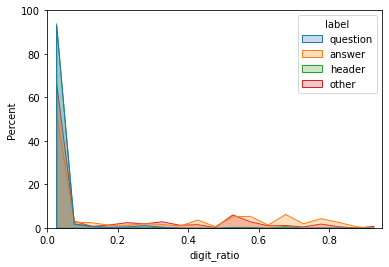

In [33]:
bin_interval = 0.05
bins_limits = np.arange(0, 1, bin_interval)

sns.histplot(data=X_train.join(y_train), x='digit_ratio', hue='label', stat='percent',
             bins=bins_limits, element='poly', common_norm=False, hue_order=label_order)

plt.xlim(bins_limits.min(), bins_limits.max())
plt.ylim(0, 100)
plt.show()

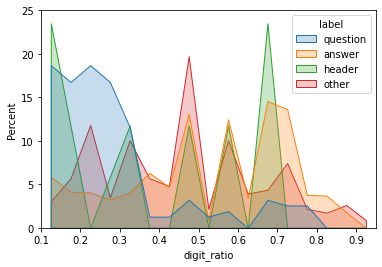

In [34]:
bin_interval = 0.05
bins_limits = np.arange(0.1, 1, bin_interval)

sns.histplot(data=X_train.join(y_train), x='digit_ratio', hue='label', stat='percent',
             bins=bins_limits, element='poly', common_norm=False, hue_order=label_order)
plt.xlim(bins_limits.min(), bins_limits.max())
plt.ylim(0, 25)
plt.show()